## Approach 1

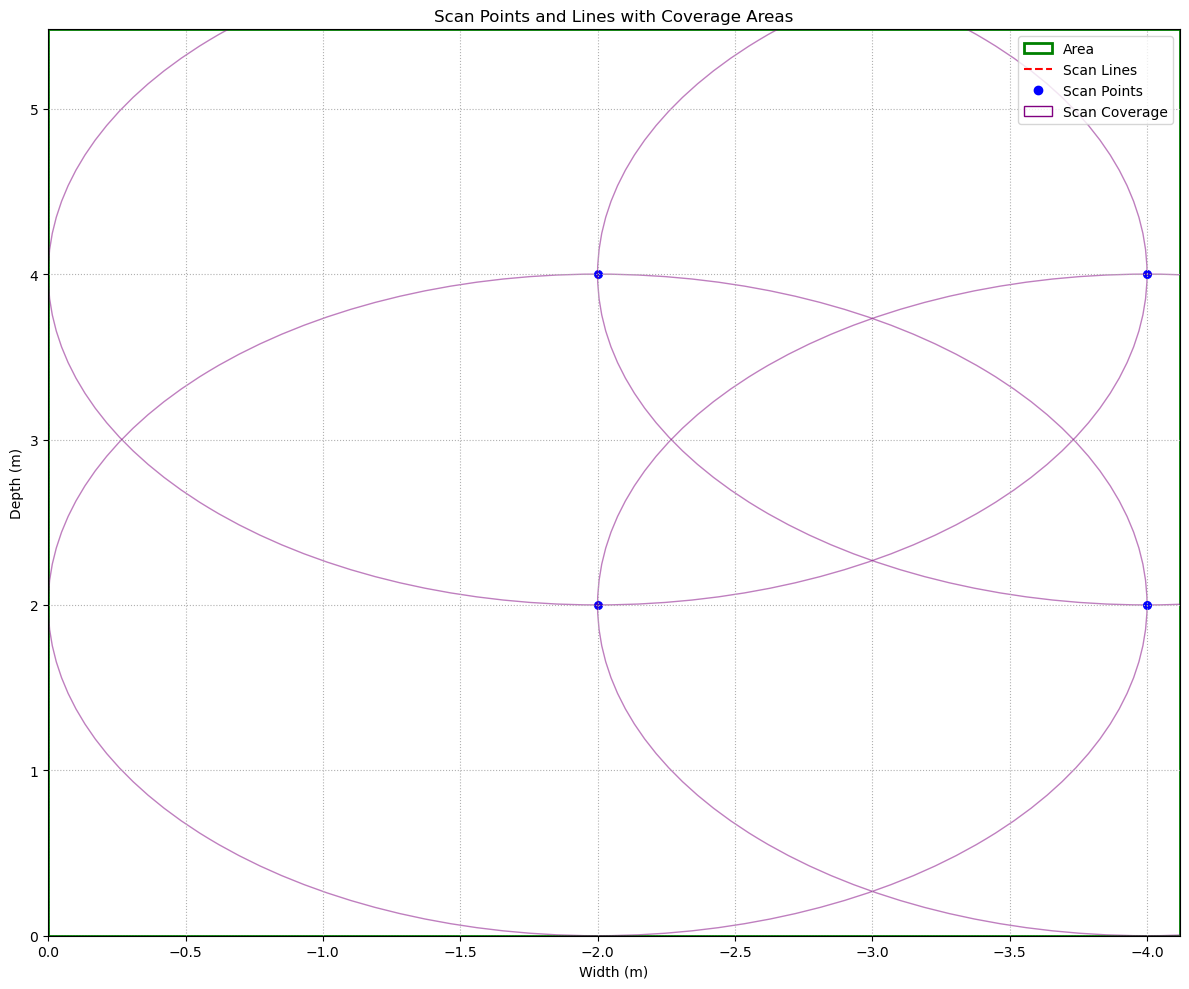

Number of scan points: 4
Scan points: [Scan Point: (-2.0, 2.0). Limited?: False, Rotation: (0, 0), Scan Point: (-2.0, 4.0). Limited?: False, Rotation: (0, 0), Scan Point: (-4.0, 4.0). Limited?: False, Rotation: (0, 0), Scan Point: (-4.0, 2.0). Limited?: False, Rotation: (0, 0)]


In [18]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, Circle

class ScanPoint:
    def __init__(self, x, y, rotation_limited : bool = False, rotation_bounds : tuple = (0, 0)):
        self.x = x
        self.y = y
        self.rotation_limited = rotation_limited
        self.rotation_bounds = rotation_bounds
        
    @property
    def coords(self):
        return self.x, self.y

    def __repr__(self):
        return f"Scan Point: ({self.x}, {self.y}). Limited?: {self.rotation_limited}, Rotation: {self.rotation_bounds}"
    

def generate_scan_points(x_lim, y_lim, scan_radius, flip_x: bool = False, flip_y: bool = False, remove_points_on_boundary=True):
    x_coords = np.arange(0, x_lim + scan_radius, scan_radius)
    y_coords = np.arange(0, y_lim + scan_radius, scan_radius)
    # Clip the last points to ensure they don't exceed the rectangle dimensions
    # scan_lines = np.clip(scan_lines, 0, x_lim)
    # scan_points = np.clip(scan_points, 0, y_lim)
    
    if remove_points_on_boundary:
        x_coords = filter_array_inplace(x_coords, 0, x_lim)
        y_coords = filter_array_inplace(y_coords, 0, y_lim)
    
    if flip_x:
        x_coords = -x_coords
        
    if flip_y:
        y_coords = -y_coords
    
    scans = []
    for i, x in enumerate(x_coords):
        if i % 2 == 0:
            for y in y_coords:
                scans.append(ScanPoint(x, y))
        else:
            for y in y_coords[::-1]:
                scans.append(ScanPoint(x, y))

    return scans


def filter_array_inplace(arr, min_value, max_value):
    indices_to_remove = np.where((arr <= min_value) | (arr >= max_value))[0]
    return np.delete(arr, indices_to_remove)

def plot_scan_points(scan_points, width, depth, max_scan_distance, flip_x=False, flip_y=False):
    if flip_x:
        width = -width
    if flip_y:
        depth = -depth
    fig, ax = plt.subplots(figsize=(12, 10))
    
    # Plot rectangle
    rect = Rectangle((0, 0), width, depth, fill=False, edgecolor='green', linewidth=2)
    ax.add_patch(rect)
    
    # Plot scan points and circles
    for point in scan_points:
        ax.scatter(*point.coords, color='blue', s=30)
        circle = Circle(point.coords, max_scan_distance, fill=False, edgecolor='purple', alpha=0.5)
        ax.add_patch(circle)
    
    # Set plot limits and labels
    ax.set_xlim(0, width)
    ax.set_ylim(0, depth)
    ax.set_xlabel('Width (m)')
    ax.set_ylabel('Depth (m)')
    ax.set_title('Scan Points and Lines with Coverage Areas')
    
    # Add grid and legend
    ax.grid(True, linestyle=':')
    ax.legend([rect, plt.Line2D([0], [0], color='red', linestyle='--'),
               plt.Line2D([0], [0], marker='o', color='blue', linestyle='None'),
               Circle((0, 0), 1, fill=False, edgecolor='purple')],
              ['Area', 'Scan Lines', 'Scan Points', 'Scan Coverage'],
              loc='upper right')
    
    plt.tight_layout()
    plt.show()

# Parameters
width = 4.12
depth = 5.48
max_scan_distance = 2
flip_x = True
flip_y = False

# Generate scan points and lines
points = generate_scan_points(width, depth, max_scan_distance, flip_x, flip_y)

# Plot the results
plot_scan_points(points, width, depth, max_scan_distance, flip_x, flip_y)

# Print information
print(f"Number of scan points: {len(points)}")
print(f"Scan points: {points}")

# Approach 2

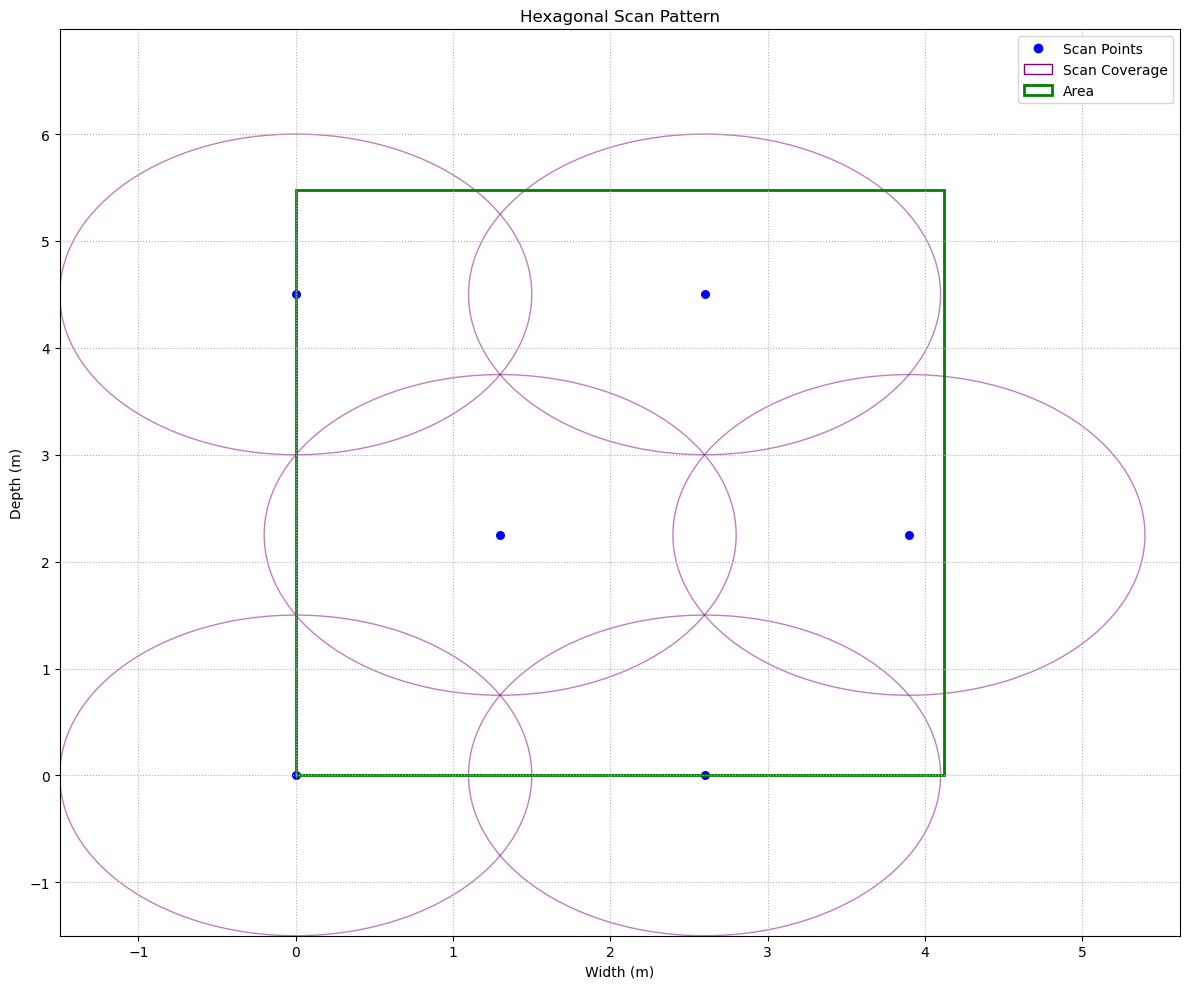

Number of scan points: 6
Scan points:
[[0.         0.        ]
 [2.59807621 0.        ]
 [1.29903811 2.25      ]
 [3.89711432 2.25      ]
 [0.         4.5       ]
 [2.59807621 4.5       ]]


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Rectangle

def generate_hexagonal_grid(width, depth, radius):
    # Calculate horizontal and vertical spacing
    dx = radius * np.sqrt(3)
    dy = radius * 1.5

    # Generate grid
    x = np.arange(0, width + dx, dx)
    y = np.arange(0, depth + dy, dy)

    # Create meshgrid
    xx, yy = np.meshgrid(x, y)

    # Offset every other row
    xx[1::2] += radius * np.sqrt(3) / 2

    # Flatten and combine coordinates
    points = np.column_stack((xx.ravel(), yy.ravel()))

    # Filter points outside the rectangle
    mask = (points[:, 0] >= 0) & (points[:, 0] <= width) & (points[:, 1] >= 0) & (points[:, 1] <= depth)
    return points[mask]

def plot_scan_pattern(width, depth, radius):
    fig, ax = plt.subplots(figsize=(12, 10))

    # Generate and plot hexagonal grid points
    points = generate_hexagonal_grid(width, depth, radius)
    ax.scatter(points[:, 0], points[:, 1], color='blue', s=30)

    # Plot circles for each point
    for x, y in points:
        circle = Circle((x, y), radius, fill=False, edgecolor='purple', alpha=0.5)
        ax.add_patch(circle)

    # Plot rectangle representing the area
    rect = Rectangle((0, 0), width, depth, fill=False, edgecolor='green', linewidth=2)
    ax.add_patch(rect)

    # Set plot limits and labels
    ax.set_xlim(-radius, width + radius)
    ax.set_ylim(-radius, depth + radius)
    ax.set_xlabel('Width (m)')
    ax.set_ylabel('Depth (m)')
    ax.set_title('Hexagonal Scan Pattern')

    # Add grid and legend
    ax.grid(True, linestyle=':')
    ax.legend([plt.Line2D([0], [0], marker='o', color='blue', linestyle='None'),
               Circle((0, 0), 1, fill=False, edgecolor='purple'),
               rect],
              ['Scan Points', 'Scan Coverage', 'Area'],
              loc='upper right')

    plt.tight_layout()
    plt.show()

    return points

# Parameters
width = 4.12
depth = 5.48
max_scan_distance = 1.5  # This is now the radius of each hexagon

# Generate and plot the hexagonal scan pattern
scan_points = plot_scan_pattern(width, depth, max_scan_distance)

# Print information
print(f"Number of scan points: {len(scan_points)}")
print(f"Scan points:\n{scan_points}")